In [2]:
import pandas as pd # type: ignore
from xarray.computation.ops import fillna # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore
import numpy as np # type: ignore
uber_data = pd.read_csv('C:\\Users\\Anjali\\Desktop\\AI_Course\\MIT\\1.AILanscape\\UberCaseStudy.csv', engine='python')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pickup_dt    29101 non-null  object 
 1   borough      29101 non-null  object 
 2   pickups      29101 non-null  int64  
 3   spd          29101 non-null  float64
 4   vsb          29101 non-null  float64
 5   temp         29101 non-null  float64
 6   dewp         29101 non-null  float64
 7   slp          29101 non-null  float64
 8   pcp01        29101 non-null  float64
 9   pcp06        29101 non-null  float64
 10  pcp24        29101 non-null  float64
 11  sd           29101 non-null  float64
 12  hday         29101 non-null  object 
 13  pickup_hour  29101 non-null  int32  
 14  pickup_day   29101 non-null  int32  
dtypes: float64(9), int32(2), int64(1), object(3)
memory usage: 3.1+ MB


C:\Users\Anjali\AppData\Local\Temp\ipykernel_12804\1701249563.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  uber_data['temp'].fillna(uber_data['temp'].median(),inplace=True)
C:\Users\Anjali\AppData\Local\Temp\ipykernel_12804\1701249563.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

np.int64(0)

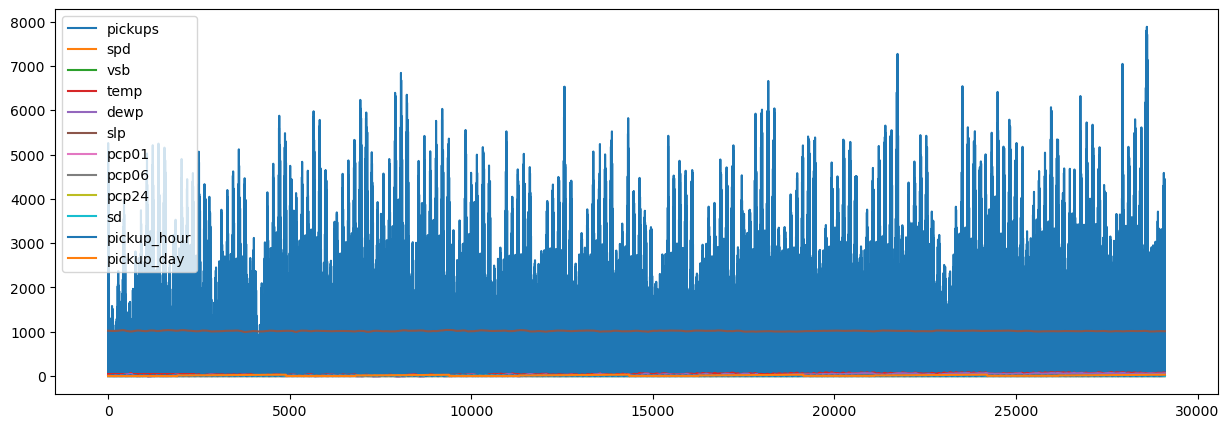

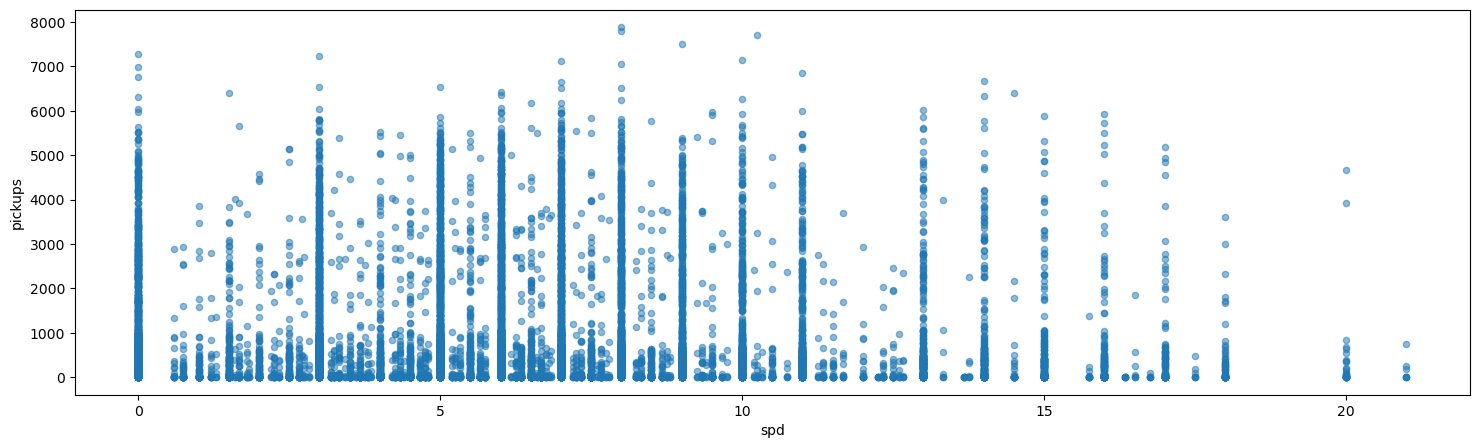

In [11]:
uber_data.plot(figsize=(15, 5))

uber_data.size
uber_data.info()
uber_data.head()
uber_data.describe()
uber_data.plot.scatter(y='pickups',x='spd', alpha=0.5, figsize=(18, 5))
uber_data.nunique()
#uber_data.plot.area(subplots=True,figsize=(15,5))
uber_data.duplicated().sum()
uber_data['temp'].fillna(uber_data['temp'].median(),inplace=True)
uber_data['borough'].fillna("Others", inplace=True)
uber_data.head()
uber_data.duplicated().sum()


In [5]:
uber_data['pickup_hour'] = pd.to_datetime(uber_data['pickup_dt'],format='mixed').dt.hour
uber_data['pickup_day'] = pd.to_datetime(uber_data['pickup_dt'],format='mixed').dt.day

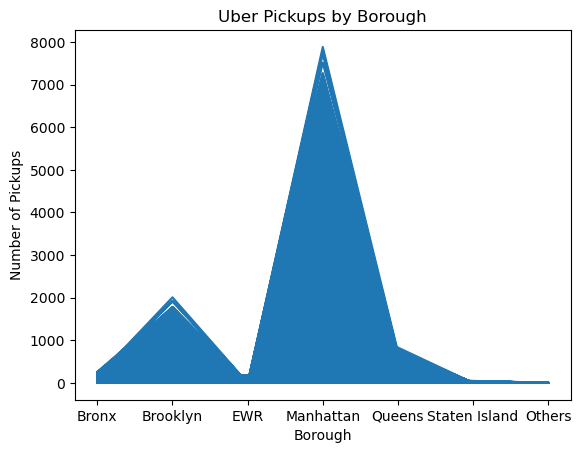

In [6]:
fig=plt.plot(uber_data['borough'], uber_data['pickups'])
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')
plt.title('Uber Pickups by Borough')
plt.show()

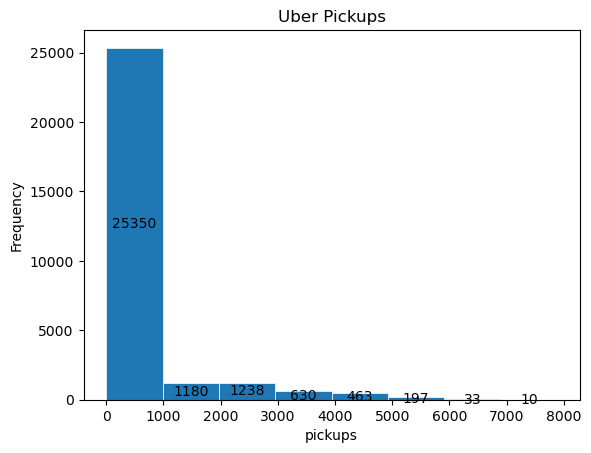

In [7]:
fig,axes = plt.subplots()
axes.set_title('Uber Pickups')
counts, bins, patches = axes.hist(uber_data['pickups'], bins=8, linewidth=0.5, edgecolor="white")# plus mark for data points
plt.bar_label(patches, labels=[f'{int(c)}' for c in counts], label_type='center')
plt.xlabel('pickups')
plt.ylabel('Frequency')
plt.show()
fig.savefig('C:\\Users\\Anjali\\Desktop\\AI_Course\\IIT Delhi\\Module-2\\uber_pickups.png')

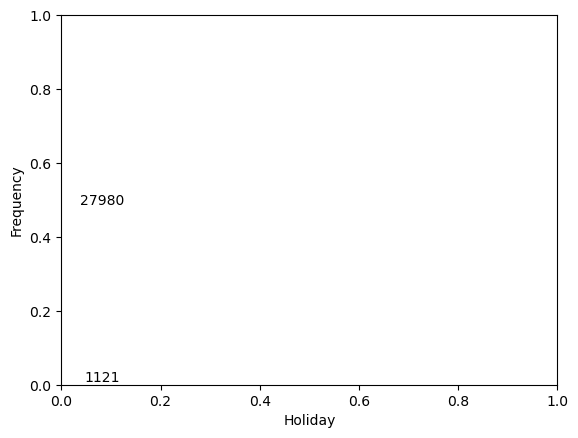

In [8]:


axes.set_title('Holiday')
counts, bins, patches = axes.hist(uber_data['hday'], bins=2, linewidth=1, edgecolor="white")# plus mark for data points
plt.bar_label(patches, labels=[f'{int(c)}' for c in counts], label_type='center')
plt.xlabel('Holiday')
plt.ylabel('Frequency')
plt.show()
fig.savefig('C:\\Users\\Anjali\\Desktop\\AI_Course\\IIT Delhi\\Module-2\\uber_holiday.png')

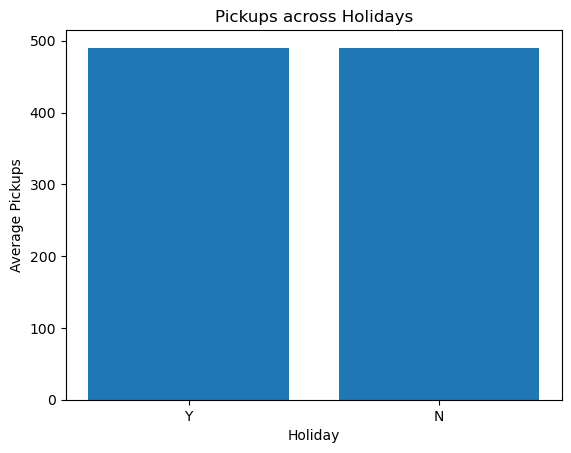

In [9]:
plt.bar(uber_data['hday'],np.mean(uber_data['pickups']))
plt.title('Pickups across Holidays')
plt.xlabel('Holiday')
plt.ylabel('Average Pickups')
plt.show()
fig.savefig('C:\\Users\\Anjali\\Desktop\\AI_Course\\IIT Delhi\\Module-2\\Pickups across Holidays.png')



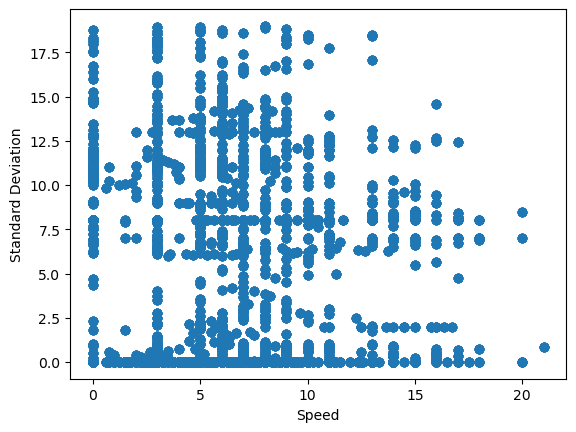

In [10]:
plt.scatter(uber_data['spd'],uber_data['sd'])
plt.xlabel('Speed')
plt.ylabel('Standard Deviation')
plt.show()

In [12]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Configure Bokeh to output to the notebook
output_notebook()

Loading BokehJS ...

In [15]:
# Prepare some sample data for the bar chart
x_categories = ['A', 'B', 'C', 'D', 'E']
y_values = [5, 8, 2, 7, 4]

# Create a new plot with a title, axis labels, and a range for x-axis categories
p = figure(x_range=uber_data['borough'], height=350, title="Simple Bokeh Bar Chart",
           x_axis_label='Borough', y_axis_label='pickups')

# Add a vertical bar renderer
p.vbar(x=uber_data['borough'], top=uber_data['pickups'], width=0.9, legend_label="Sample Data",
       color="olivedrab")

# Customize plot properties
p.xgrid.grid_line_color = None # Hide x-grid lines
p.y_range.start = 0 # Start y-axis from 0

# Show the results
show(p)

ERROR:bokeh.core.validation.check:E-1019 (DUPLICATE_FACTORS): FactorRange must specify a unique list of categorical factors for an axis: duplicate factors found: 'Bronx', 'Brooklyn', 'EWR', 'Manhattan', 'Queens', 'Staten Island', 'Others'


In [21]:

p = figure(title="Multiple line example", x_axis_label="x", y_axis_label="y")

# add multiple renderers
p.line(uber_data['temp'], uber_data['spd'], legend_label="Temp.", color="blue", line_width=2)
p.line(uber_data['temp'], uber_data['vsb'], legend_label="Rate", color="red", line_width=2)
p.line(uber_data['temp'], uber_data['dewp'], legend_label="Objects", color="green", line_width=2)

show(p)

In [23]:
import numpy as np

from bokeh.plotting import figure, show

# generate some data
N = 1000

# generate radii and colors based on data
radii = uber_data['temp'] / 100 * 2
colors = ["#%02x%02x%02x" % (255, int(round(value * 255 / 100)), 255) for value in uber_data['temp']]

# create a new plot with a specific size
p = figure(
    title="Vectorized colors and radii example",
    sizing_mode="stretch_width",
    max_width=1200,
    height=400,
)

# add circle renderer
p.circle(
    uber_data['pickups'],
    uber_data['temp'],
    radius=radii,
    fill_color=colors,
    fill_alpha=0.6,
    line_color="blue",
)

# show the results
show(p)